# **Módulo** | Python: Projeto Final
Caderno de **Aula**<br>
Aluno
Eduardo Minoru Togo


---

# **Tópicos**

<ol type="1">
  <li>Situação Problema;</li> 
  <li>Faça a exploração, manipulação, limpeza e visualização de dados no Kaglle;</li>
  <li>Construa o seu storytelling, ou seja, conte sua história e os insights que serão gerados a partir dos dados analisados;</li>
  <li>Publique sua análise no Kaggle e compartilhe o link com a tutoria para avaliação.</li>
</ol>


---

## 1\. Sitauação Problema:

A gestão de crédito eficiente é crucial para o sucesso financeiro de qualquer empresa. Este relatório examina os dados fornecidos pela Empresa X, com o intuito de identificar os principais fatores relacionados à adimplência e inadimplência, visando aprimorar a gestão de crédito e diminuir a frequência de inadimplência.


## 2\. Faça a exploração, manipulação, limpeza e visualização de dados no Kaglle.

## 2.1\. Entendendo os dados:

Os dados foram carregados no Kaggle e estão no formato CSV, contendo informações detalhadas sobre os clientes de uma instituição financeira. Nosso principal objetivo é analisar a segunda coluna, denominada "default", que indica se um cliente é adimplente (default = 0) ou inadimplente (default = 1). Em outras palavras, buscamos entender as razões que levam um cliente a não honrar suas dívidas, com base na análise de outros atributos, como salário, escolaridade e movimentação financeira. Abaixo segue uma descrição completa dos atributos disponíveis.

Segue descrição da tabela:

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |


## 2.2\. Explorando e entendendo a estrutura:

Para ler os dados iremos utilizar o pandas. Nessa etapa iremos ler o arquivo csv, notem que utilizaremos o argumento na_values ='na', tal arugmento será utilizado para tratar dados ausentes.

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/projeto-final/Python_M10_support material.csv', na_values='na')
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Agora que conseguimos acessar os dados, verificamos os tipos de informações de cada coluna.

In [3]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Devemos verificar com quantas informações estamos trabalhando.

In [4]:
df.shape # retorna uma tupla (qtd linhas, qtd colunas)

(10127, 16)

Como nosso objetivo é verificar os motivos que levam a inadimplência, vamos verificar quantos estão adimplentes e quantos estão inadimplentes. (Indica se o cliente é adimplente (0) ou inadimplente (1))

In [5]:
df[df['default'] == 0].shape

(8500, 16)

Verificamos que 8500 estão adimplentes.

In [6]:
df[df['default'] == 1].shape

(1627, 16)

Verificamos que 1627 estão inadimplentes.

Para ficar melhor a visualização, podemos ver qual a porcentagem diante do total.

In [7]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


Continuando a exploração ao banco fornecido, utilizando a função 'describe', vamos verificar um resumo dos nossos dados que são do tipo object.

In [8]:
resumo= df.select_dtypes('object').describe().transpose()
resumo.columns=['naonulo','unique', 'moda','frequencia']
resumo

,naonulo,unique,moda,frequencia
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Nesse resumo podemos perceber que os campos 'escolaridade', 'estado_civil' e 'salario_anual', não estão todos preenchidos, existindo valores nulos nesses campos que posteriormente deverão ter o seu devido tratamento. A coluna sexo possui 10.127 valores não nulos, com 2 valores únicos, sendo F a moda, que aparece 5.358 vezes. A coluna escolaridade contém 8.608 valores não nulos, com 5 valores únicos, e a moda é mestrado, aparecendo 3.128 vezes. Na coluna estado_civil, há 9.378 valores não nulos, 3 valores únicos, e a moda é casado, que aparece 4.687 vezes. A coluna salario_anual tem 9.015 valores não nulos, 5 valores únicos, e a moda é menos que $40K, com uma frequência de 3.561. A coluna tipo_cartao possui 10.127 valores não nulos, 4 valores únicos, com blue sendo a moda, aparecendo 9.436 vezes. A coluna limite_credito contém 10.127 valores não nulos, 9.272 valores únicos, sendo 1.438,21 a moda, que aparece 11 vezes. Por fim, a coluna valor_transacoes_12m tem 10.127 valores não nulos, 10.035 valores únicos, e a moda é 3.851,51, aparecendo 3 vezes.

Essa análise fornece uma visão resumida dos dados categóricos no conjunto de dados, mostrando a contagem de valores não nulos, a quantidade de valores únicos, a moda (valor mais frequente) e a frequência da moda (quantas vezes o valor mais frequente aparece). Isso ajuda a entender melhor a distribuição e a variabilidade dos dados categóricos no conjunto de dados analisado.

Agora vamos observar os dados sobre as colunas preenchidas com números. Dessa vez não iremos renomear as colunas visto que já é intuitivo, sendo mean a média e std o devio padrão.

In [9]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()


,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Inicialmente notamos que os dados numéricos estão preenchidos em todas as linhas. Verificamos também que a variável "meses_inativo_12m" tem uma média de 2,34 meses inativos, com um desvio padrão de 1,02 meses. O número de meses inativos varia entre 0 e 6, com 25% dos clientes tendo até 2 meses inativos, 50% até 3 meses inativos e 75% até 3 meses inativos. A variável "qtd_transacoes_12m" tem uma média de 64,86 transações, com um desvio padrão de 23,47 transações. O número de transações varia entre 10 e 139, com 25% dos clientes tendo até 45 transações, 50% até 67 transações e 75% até 81 transações.

## 2.3\. Verificando os dados faltantes

Utilizando esse metodo isna().any(), ele irá varrer cada coluna verifricando se existe pelo menos um valor True(um valor ausente presente) na coluna.

In [10]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Como já explorado nas etapas anteriores verificamos que os campos 'escolaridade', 'estado_civil' e 'salario_anual', contem dados NA. Agora que sabemos das colunas que faltam dados, devemos saber o impacto que elas terão sobre as estatisticas. 

In [12]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [13]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [14]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [15]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Notamos que a porcentagem de dados faltantes são equivalentes para os adimplente a inadimplentes.

## 3\. Transformação e limpeza de dados

## 3.1\. Corrigindo o schema

Como vimos na etapa de exploração de dados, vimos que os campos limite de credito e valor de transacoes em 12 meses, estão como tipo objeto, para realizar nossos estudos se faz necessário realizar o devido tratamento.

In [16]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [17]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Para não alterar em toda tabela sem antes testar, criamos uma lista de numeros conforme os campos que queremos transformar, e executamos a transformação dos dados.

In [18]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [19]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

In [20]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


## 3.2\. Removendo dados faltantes

Vamos analisar os dados faltantes novamente, antes de apagar.

In [21]:
df.shape

(10127, 16)

In [22]:
df[df['default'] == 0].shape

(8500, 16)

In [23]:
df[df['default'] == 1].shape

(1627, 16)

In [25]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape


In [26]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 83.93%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 16.07%


Agora vamos apagar os dados e analisar novamente.

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape

(7081, 16)

In [29]:
df[df['default'] == 0].shape

(5968, 16)

In [30]:
df[df['default'] == 1].shape

(1113, 16)

In [31]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [32]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Dessa forma observamos que apesar da perca de dados, percentualmente ela se torna igual para ambas as opções. 

## 4\. Visualizando os dados

Começamos então importando os pacotes de visualização e separando os clientes adimplentes e inadimplentes 

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [34]:
df_adimplente = df[df['default'] == 0]

In [35]:
df_inadimplente = df[df['default'] == 1]

## 4\. Verificando os atributos categóricos e relacionando com nossa variavel de interesse

In [36]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


## 4.1\. Distribuição de Clientes por Salário Anual e Situação de Pagamento

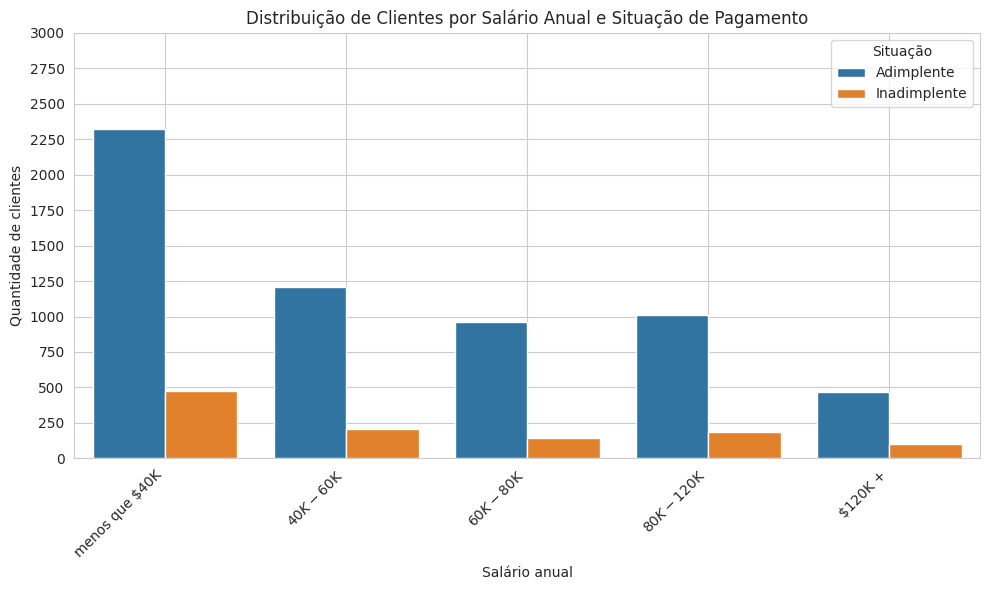

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(
    x='salario_anual',
    hue='default',
    data=df,
    order=['menos que $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],
    ax=ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel('Quantidade de clientes')
ax.set_xlabel('Salário anual')
ax.set_yticks(range(0, 3250, 250))

legends = ['Adimplente', 'Inadimplente']
ax.legend(legends, title='Situação')
ax.grid(True)

ax.set_title('Distribuição de Clientes por Salário Anual e Situação de Pagamento')

plt.tight_layout()
plt.show()

Podemos observar no gráfico que a proporção de inadimplentes é maior na faixa que ganha menos de 40k por ano, porém, os clientes com salario anual abaixo de 40 são a maioria. 

## 4.3\. Distribuição de Clientes por Escolaridade e Situação de Pagamento

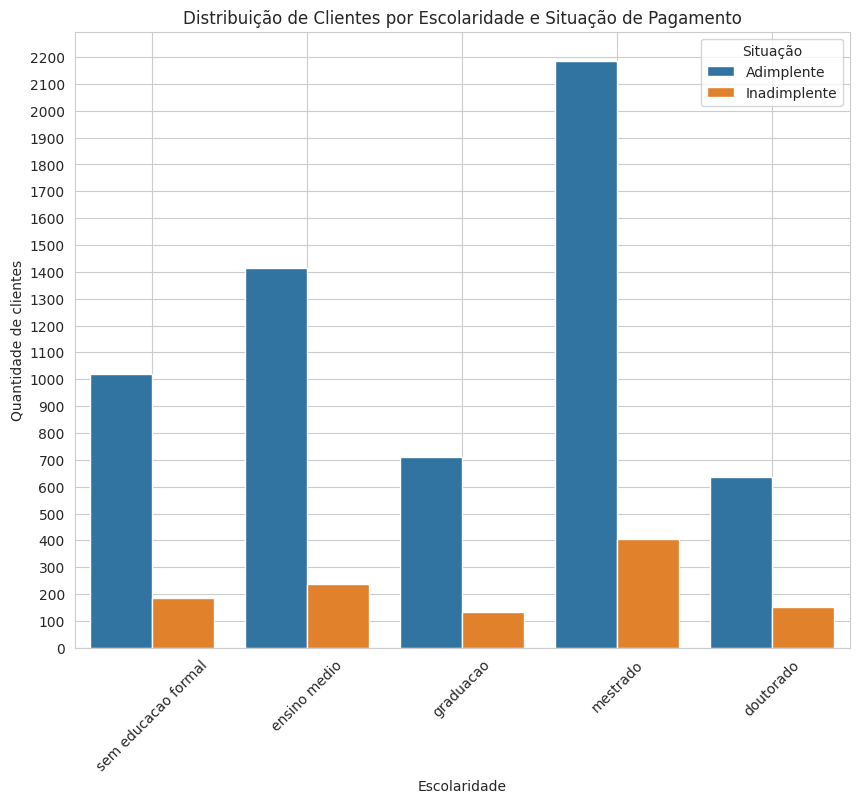

In [42]:
plt.figure(figsize=(10, 8))

sns.countplot(
    x='escolaridade',
    hue='default',
    data=df,
    order=['sem educacao formal', 'ensino medio', 'graduacao', 'mestrado', 'doutorado']
)

plt.grid(True)
plt.yticks(range(0, 2300, 100))

legends = ['Adimplente', 'Inadimplente']
plt.legend(legends, title='Situação')

plt.xticks(rotation=45)
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade de clientes')
plt.title('Distribuição de Clientes por Escolaridade e Situação de Pagamento')

plt.show()

Observado o gráfico de escolaridade, não conseguimos ter uma conclusão clara, dessa forma vamos tentar analisar de maneira diferente.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que o DataFrame df foi carregado corretamente
# Substitua o caminho abaixo pelo seu arquivo de dados
# df = pd.read_csv('seu_arquivo.csv')

# Valide as colunas e categorias
if 'escolaridade' not in df.columns or 'default' not in df.columns:
    raise ValueError("As colunas 'escolaridade' e 'default' precisam estar presentes no DataFrame.")

# Verifique as categorias em 'escolaridade' antes de continuar
print("Categorias disponíveis em 'escolaridade':", df['escolaridade'].unique())

# Calcular os totais
total = df.groupby('escolaridade')['default'].count()
default_counts = df.groupby(['escolaridade', 'default']).size().unstack(fill_value=0)
porcentagem = default_counts.div(total, axis=0) * 100

# Ajustar categorias, se necessário
categorias = ['sem educacao formal', 'ensino medio', 'graduacao', 'mestrado', 'doutorado']
porcentagem = porcentagem.reindex(categorias, fill_value=0)

# Criar o gráfico
plt.figure(figsize=(10, 8))
porcentagem.plot(kind='bar', stacked=True, ax=plt.gca())

# Configurar o gráfico
plt.grid(True)
plt.yticks(range(0, 101, 10))
plt.legend(['Adimplente', 'Inadimplente'], title='Situação')
plt.xticks(rotation=45)
plt.xlabel('Escolaridade')
plt.ylabel('Porcentagem de clientes')
plt.title('Distribuição de Clientes por Escolaridade e Situação de Pagamento (em Porcentagem)')

plt.show()


NameError: name 'df' is not defined

Com esse tipo de gráfico em porcentagem fica mais claro que existe pouca diferença entre os niveis de escolaridade seja de adimplentes como de inadimplentes.

## 4.4\. Distribuição de Clientes por Estado Civil e Situação de Pagamento

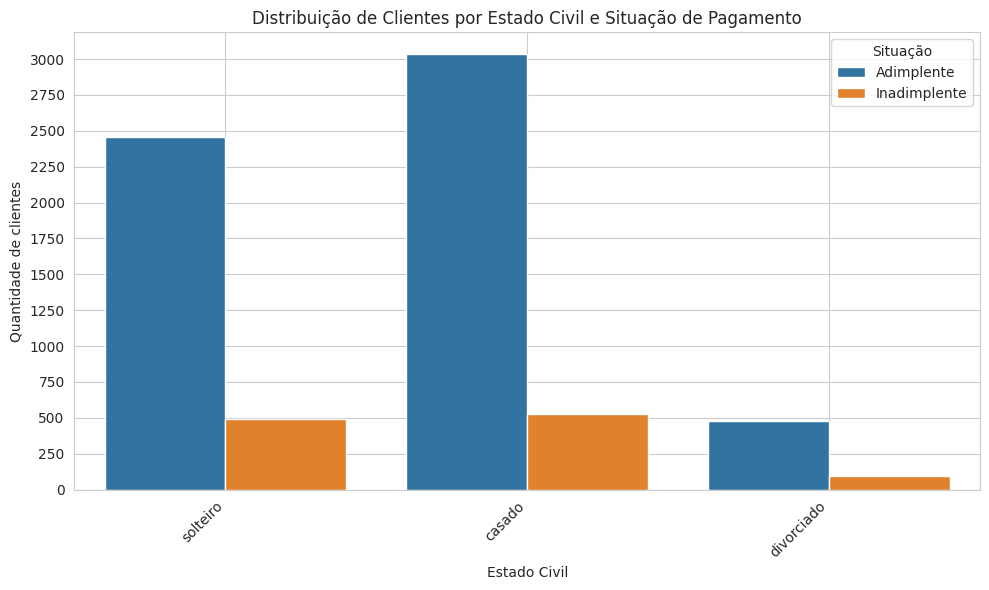

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(
    x='estado_civil',
    hue='default',
    data=df,
    order=['solteiro', 'casado', 'divorciado'],
    ax=ax
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel('Quantidade de clientes')
ax.set_xlabel('Estado Civil')
ax.set_yticks(range(0, 3250, 250))

legends = ['Adimplente', 'Inadimplente']
ax.legend(legends, title='Situação')
ax.grid(True)
ax.set_title('Distribuição de Clientes por Estado Civil e Situação de Pagamento')

plt.tight_layout()

plt.show()

Da mesma maneira que o dado categórico de escolaridade, naõ conseguimos chegar a uma conclusão. Vamos tentar utilizando o grafico com porcentagem.

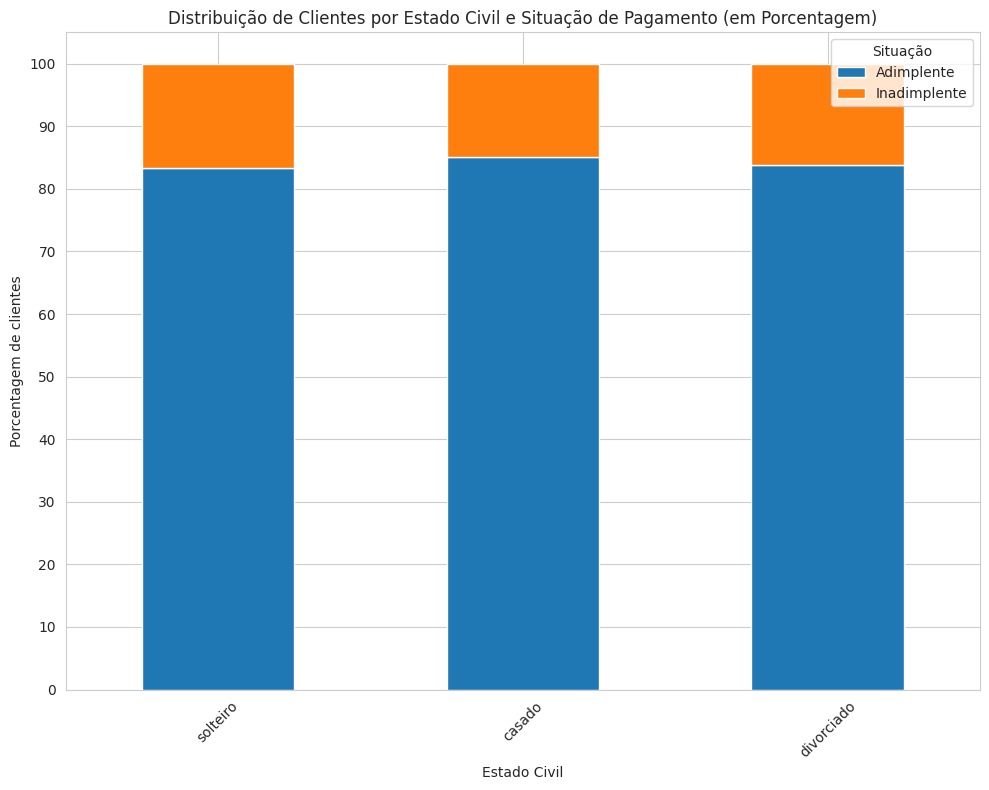

In [46]:
# Calcular a contagem total de clientes por estado civil
total = df.groupby('estado_civil')['default'].count()

# Calcular a contagem de clientes adimplentes e inadimplentes por estado civil
default_counts = df.groupby(['estado_civil', 'default']).size().unstack(fill_value=0)

# Converter as contagens em porcentagens
porcentagem = default_counts.div(total, axis=0) * 100

# Plotar o gráfico de barras com porcentagens para estado civil
plt.figure(figsize=(10, 8))

# Reordenar os dados conforme necessário
order = ['solteiro', 'casado', 'divorciado']
porcentagem = porcentagem.reindex(order)

porcentagem.plot(kind='bar', stacked=True, ax=plt.gca())

plt.grid(True)
plt.yticks(range(0, 101, 10))

legends = ['Adimplente', 'Inadimplente']
plt.legend(legends, title='Situação')

plt.xticks(rotation=45)
plt.xlabel('Estado Civil')
plt.ylabel('Porcentagem de clientes')
plt.title('Distribuição de Clientes por Estado Civil e Situação de Pagamento (em Porcentagem)')

plt.tight_layout()
plt.show()

Observamos que o Estado civil, não influência na inadimplência.

In [47]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


## 4.5\. Distribuição de Clientes por Tipo de Cartão e Situação de Pagamento

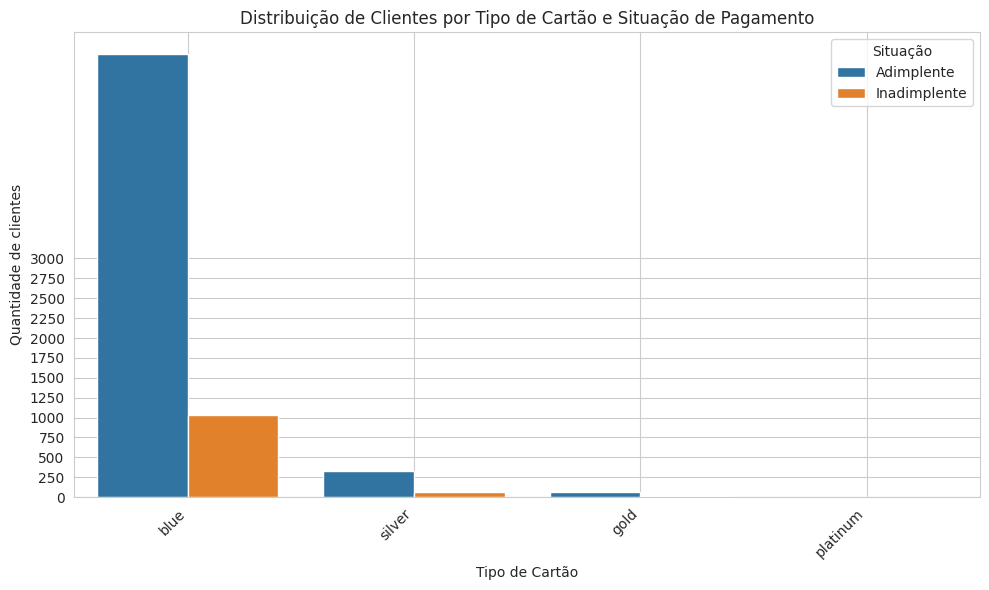

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(
    x='tipo_cartao',
    hue='default',
    data=df,
    order=['blue', 'silver', 'gold', 'platinum'],
    ax=ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel('Quantidade de clientes')
ax.set_xlabel('Tipo de Cartão')
ax.set_yticks(range(0, 3250, 250))

legends = ['Adimplente', 'Inadimplente']
ax.legend(legends, title='Situação')
ax.grid(True)

ax.set_title('Distribuição de Clientes por Tipo de Cartão e Situação de Pagamento')

plt.tight_layout()
plt.show()


Com esse gráfico notamos que o cartao mais utlizado é o blue, porém ele não explica a inadimplencia, pois no gráfico de porcentagem notamos que a inadimplencia é equivalente entre os cartões.

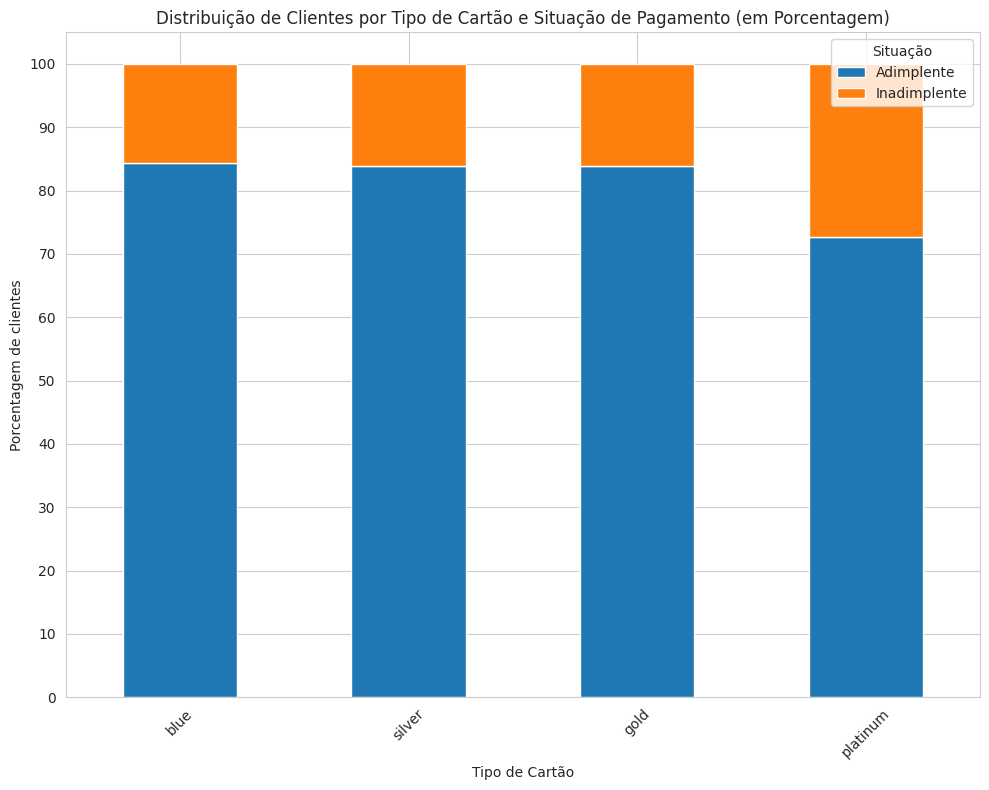

In [49]:


# Calcular a contagem total de clientes por tipo de cartão
total_tipo_cartao = df.groupby('tipo_cartao')['default'].count()

# Calcular a contagem de clientes adimplentes e inadimplentes por tipo de cartão
default_counts_tipo_cartao = df.groupby(['tipo_cartao', 'default']).size().unstack(fill_value=0)

# Converter as contagens em porcentagens
porcentagem_tipo_cartao = default_counts_tipo_cartao.div(total_tipo_cartao, axis=0) * 100

# Plotar o gráfico de barras com porcentagens para tipo de cartão
plt.figure(figsize=(10, 8))

# Ordenar os dados conforme necessário (se houver uma ordem específica desejada)
order = ['blue', 'silver', 'gold', 'platinum']
porcentagem_tipo_cartao = porcentagem_tipo_cartao.reindex(order)

porcentagem_tipo_cartao.plot(kind='bar', stacked=True, ax=plt.gca())

plt.grid(True)
plt.yticks(range(0, 101, 10))

legends = ['Adimplente', 'Inadimplente']
plt.legend(legends, title='Situação')

plt.xticks(rotation=45)
plt.xlabel('Tipo de Cartão')
plt.ylabel('Porcentagem de clientes')
plt.title('Distribuição de Clientes por Tipo de Cartão e Situação de Pagamento (em Porcentagem)')

plt.tight_layout()
plt.show()


## 4.6\. Sobre os Dados Categóricos

Podemos concluir com os dados categóricos  a proporção de inadimplentes é maior na faixa que ganha menos de 40k por ano, porém os clientes com salario anual abaixo de 40k são a maioria também. No caso da escolaridade existe uma equivalência entre os inadimplentes e os adimplentes nas diferentes escolaridades. Entre estado civil, os casados consomem mais os serviços 


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


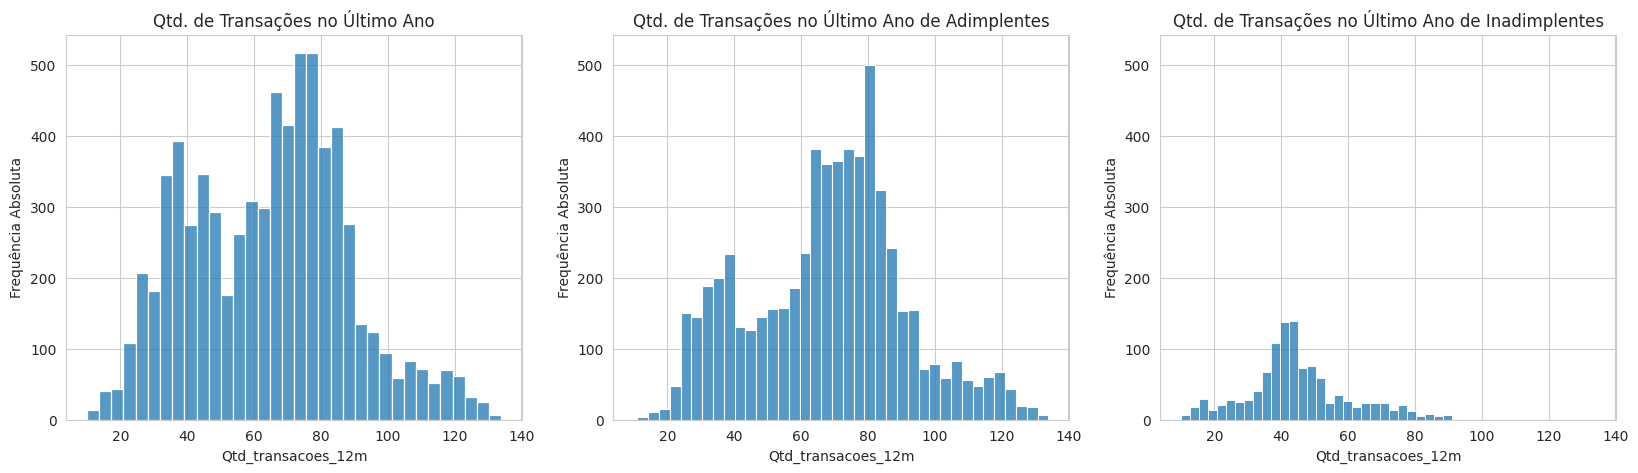

In [50]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


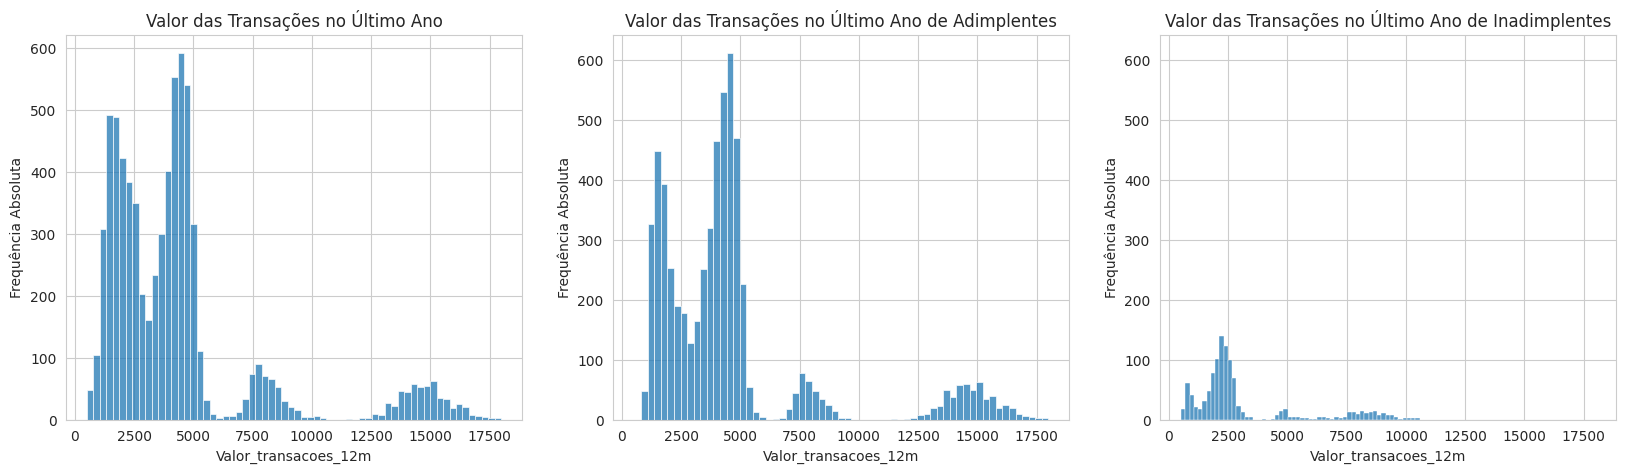

In [51]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

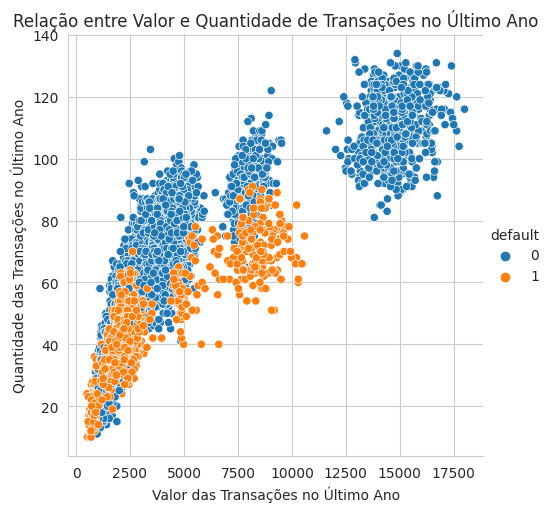

In [ ]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

Insights Principais:
Inadimplência por Escolaridade:

A quantidade de inadimplentes é semelhante em todos os níveis de escolaridade. Isso indica que o grau de escolaridade, por si só, não é um fator significativo para prever inadimplência.
Renda Anual e Inadimplência:

A maioria dos inadimplentes tem renda anual inferior a 40k. Contudo, como essa faixa salarial representa a maioria da base de clientes, é natural que também seja a mais representada entre os inadimplentes.
Transações Elevadas e Adimplência:

Clientes que realizam transações individuais acima de 11k anuais têm uma maior tendência à adimplência. Isso pode indicar maior estabilidade financeira e um maior engajamento com o serviço.
Clientes com Transações Baixas (Abaixo de 5k):

Eles representam a maior parte dos inadimplentes, mas, em termos de volume financeiro total, contribuem mais do que os clientes que realizam transações acima de 11k.

Total de transações anuais para clientes com transações abaixo de 5k: R$17.649.622,69.

Total de transações anuais para clientes com transações acima de 11k: R$7.990.336,68.

